# Explore Nextstrain's open data

This notebook assumes you've downloaded nextstrain's [open metadata](https://docs.nextstrain.org/projects/ncov/en/latest/reference/remote_inputs.html):
```sh
mkdir -p results/nextstrain
gsutil cp gs://nextstrain-data/files/ncov/metadata.tsv.gz results/nextstrain/
python scripts/preprocess_nextstrain.py
```

In [1]:
from collections import Counter
from pprint import pprint
import pickle
import torch
import matplotlib.pyplot as plt

In [2]:
columns = pickle.load(open("results/nextstrain.columns.pkl", "rb"))
stats = pickle.load(open("results/nextstrain.stats.pkl", "rb"))
features = torch.load("results/nextstrain.features.pt")
dataset = torch.load("results/nextstrain.data.pt")

In [3]:
print(len(columns["lineage"]))

2473305


In [4]:
for k, v in stats.items():
    print(f"{k} (len = {len(v)}):")
    pprint(v.most_common(10))

day (len = 693):
[(639, 18303),
 (646, 17060),
 (611, 15856),
 (612, 15482),
 (652, 15323),
 (613, 15315),
 (641, 15119),
 (638, 15004),
 (610, 14950),
 (648, 14884)]
location (len = 399):
[('United Kingdom / England', 808894),
 ('USA / California', 160482),
 ('USA / USA', 149134),
 ('United Kingdom / Scotland', 101029),
 ('USA / Florida', 100159),
 ('USA / Minnesota', 74819),
 ('USA / Massachusetts', 65694),
 ('USA / Texas', 64377),
 ('Germany / North Rhine Westphalia', 42608),
 ('USA / Washington', 36111)]
lineage (len = 1316):
[('B.1.1.7', 487438),
 ('AY.4', 449422),
 ('AY.103', 145082),
 ('AY.44', 140791),
 ('AY.25', 115460),
 ('AY.3', 83979),
 ('B.1.2', 53488),
 ('B.1.617.2', 52487),
 ('AY.122', 36236),
 ('AY.43', 34169)]
aa (len = 42556):
[('S:D614G', 2454382),
 ('ORF1b:P314L', 2444997),
 ('S:L452R', 1531293),
 ('ORF3a:S26L', 1526863),
 ('M:I82T', 1526670),
 ('S:P681R', 1526016),
 ('N:D377Y', 1517684),
 ('ORF1b:P1000L', 1517147),
 ('N:R203M', 1513010),
 ('ORF1b:G662S', 1507063)]


## Before aggregation

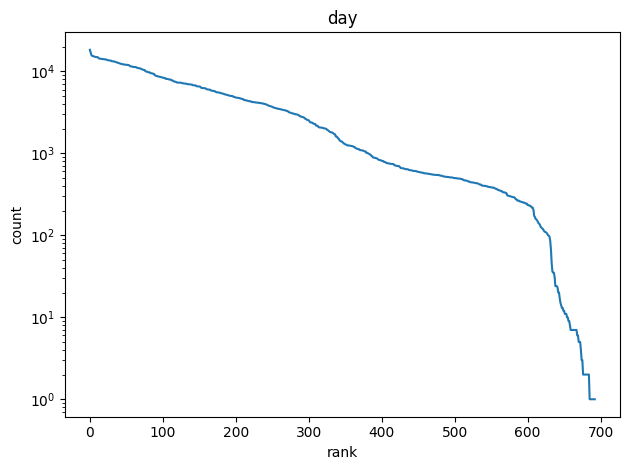

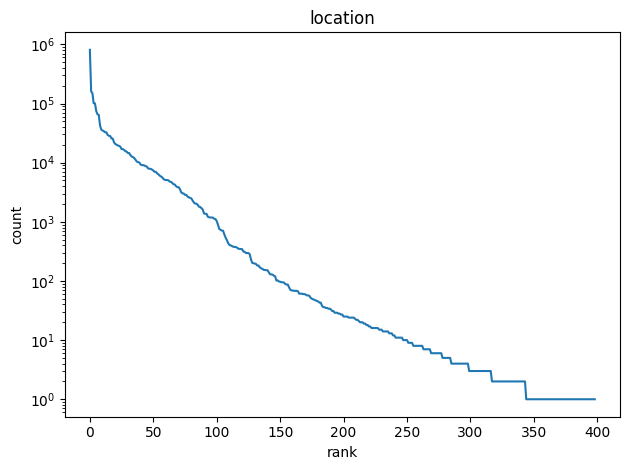

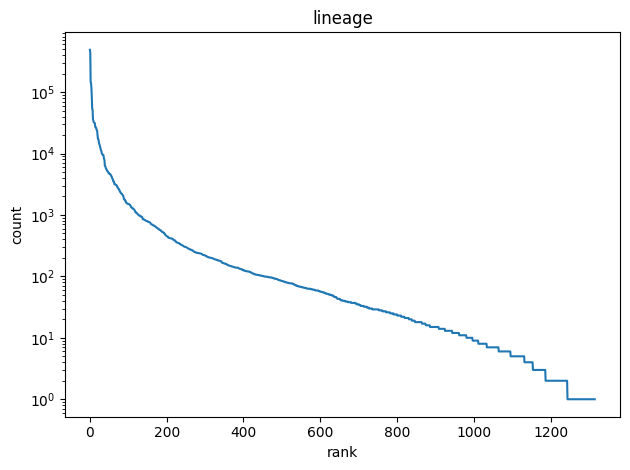

In [5]:
for name in ["day", "location", "lineage"]:
    Y = [c for _, c in stats[name].most_common()]
    plt.figure()
    plt.plot(Y)
    plt.yscale("log")
    plt.ylabel("count")
    plt.xlabel("rank")
    plt.title(name)
    plt.tight_layout()

Least common locations.

In [6]:
rare_locations = [l for l, _ in stats["location"].most_common()]
rare_locations.reverse()
print(rare_locations[:20])

['Zambia / Zambia', 'South Africa / KwaZulu-Natal', 'Uzbekistan / Fergana Region', 'Uzbekistan / Bukhara Region', 'Uzbekistan / Qashqadaryo Region', 'Tunisia / Ben Arous', 'Tunisia / Bizerte', 'France / Auvergne-Rhône-Alpes', 'Serbia / Vojvodina', 'Serbia / Central Banat District', 'Kosovo / Ferizaj', 'Serbia / Medvedja', 'Kosovo / Mitrovica', 'Sierra Leone / Bonthe', 'Sierra Leone / Western Area', 'Russia / Penza', 'Russia / Samara', 'Singapore / Singapore', 'Philippines / Central Luzon', 'Pakistan / Rawalpindi']


## After aggregation

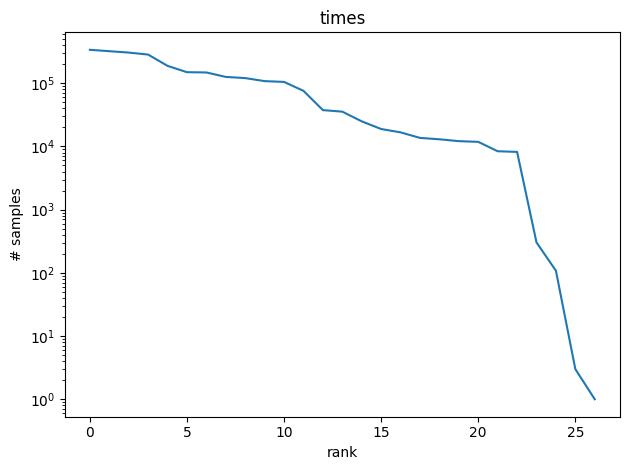

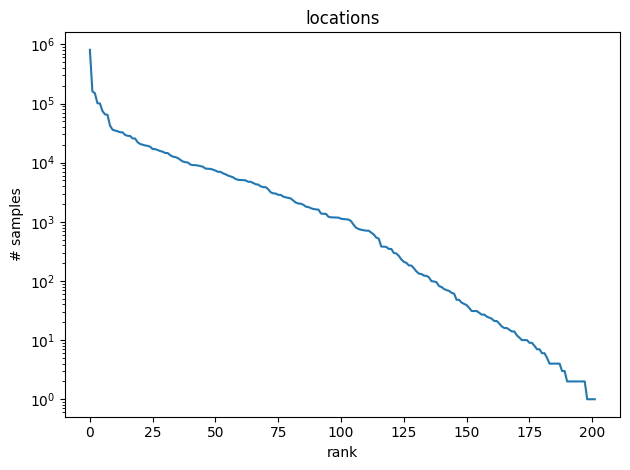

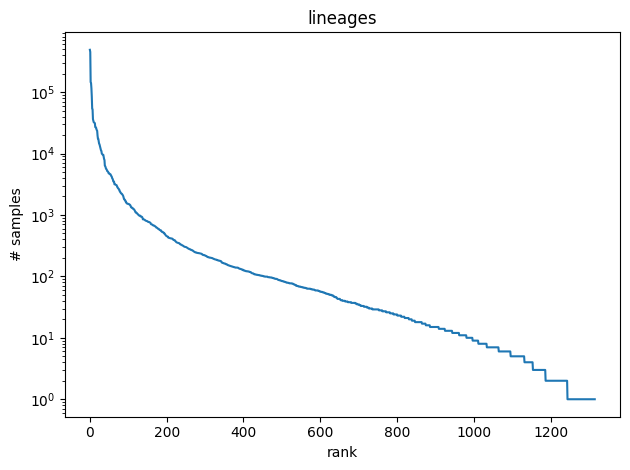

In [7]:
for i, name in enumerate(["times", "locations", "lineages"]):
    axes = [0, 1, 2]
    axes.remove(i)
    plt.figure()
    plt.plot(dataset["counts"].sum(axes).sort(0, descending=True).values.numpy())
    plt.yscale("log")
    plt.ylabel("# samples")
    plt.xlabel("rank")
    plt.title(name)
    plt.tight_layout()